<img src='https://assets.vogue.in/photos/5ce425024a30b34f3112cab9/master/pass/These-are-the-skincare-ingredients-you-should-look-for-by-your-skin-type.jpg' width=1000/>

**A note on data acquisition and feature engineering**: We scraped [Sephora](https://www.sephora.com/) and [Amazon](https://www.amazon.com/) using selenium webdriver and got two dataframes: user data and product data. They were merged together on unique user id, cleaned, which resulted in a big dataframe with the following columns: 'Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color','Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating','Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive','Cat
egory', 'Product_Url', 'User_id', 'Product_id','Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import layout, column, row
from ipywidgets import interact


from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\TRAM
[nltk_data]     ANH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\TRAM
[nltk_data]     ANH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TRAM
[nltk_data]     ANH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('skindataall.csv', index_col=[0])

In [5]:
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


# EDA and Data Visualizations

<Axes: xlabel='Skin_Tone'>

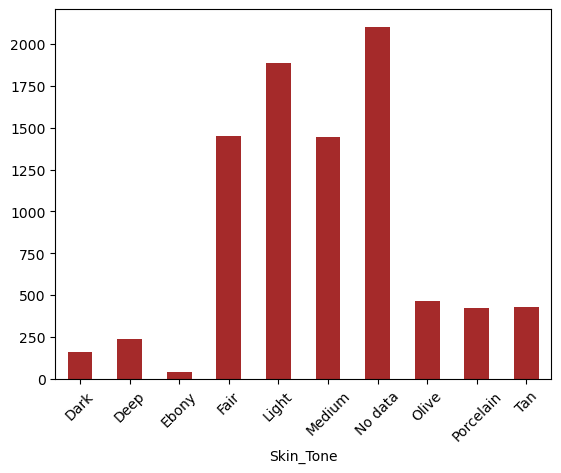

In [6]:
skintone_stats = df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color = 'brown', rot=45)

<Axes: xlabel='Skin_Type'>

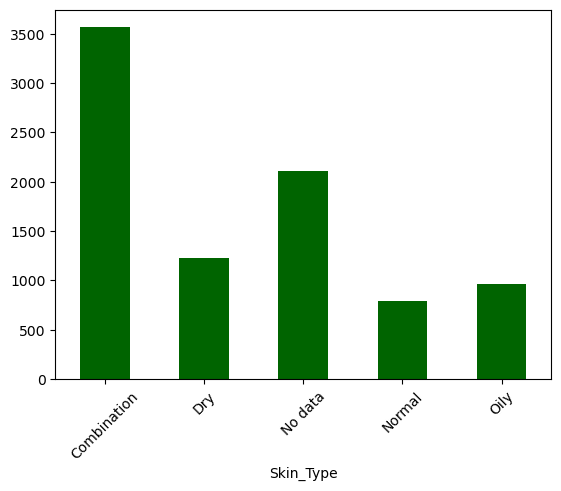

In [7]:
skintype_stats = df.groupby('Skin_Type')['Username'].count()
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

<Axes: xlabel='Eye_Color'>

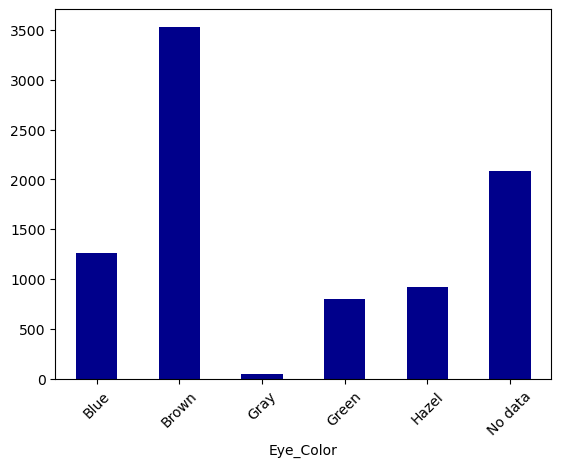

In [8]:
eyecolor_stats = df.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color = 'darkblue', rot=45)

<Axes: xlabel='Hair_Color'>

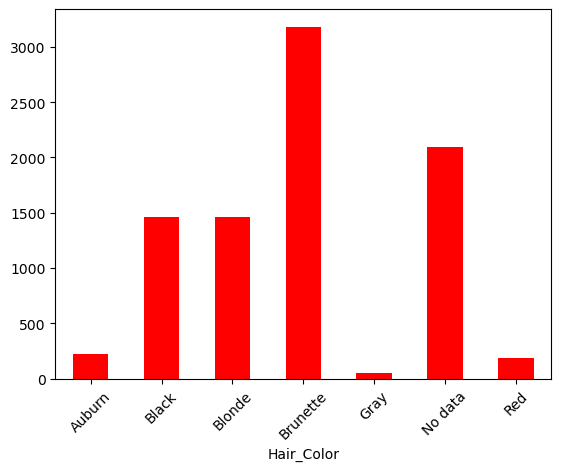

In [9]:
haircolor_stats = df.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color = 'red', rot=45)

<Axes: xlabel='Rating_Stars'>

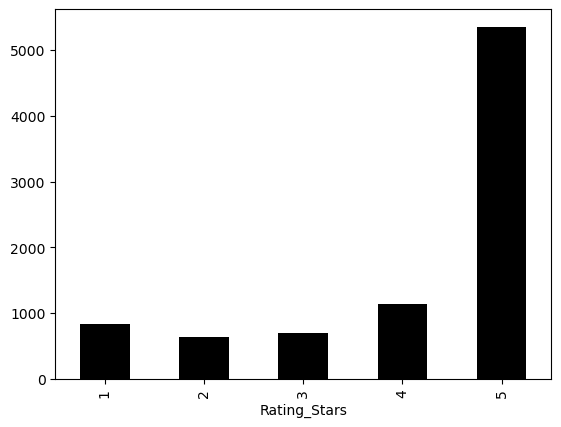

In [10]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

As we can see on the graph above, the ratings are unevenly distributed. One may expect to see more balanced ratings, or more 1-star reviews, but in reality, 5-star is a dominant class. This means that Sephora customers mostly write reviews when they are happy with the product. This may cause some problems in building a recommendation system, so the threshold should be 'greater than 4' and '4 or less'. We only want to recommend products that a user will rate with 5 stars.

# Just for fun: Markov Chain neural net for language generator

In [11]:
import markovify
import string

In [12]:
def no_punct(string):
    no_punct_string = re.sub(r'[^\w\s]', '', string)
    return no_punct_string

In [13]:
df['Review'] = df.apply(lambda row: no_punct(row['Review']), axis=1)

In [14]:
text_model = markovify.NewlineText(df.Review, state_size = 2)

In [15]:
for i in range(3):
    print(text_model.make_sentence())

I bought the smaller sizes to try the combooily formula because thats what youre supposed to be alcoholfree after being more ingredient conscious I brought a lot gets wasted when you buy the full size but sadly it just didnt do much I love other Caudalie products but I always go back and got a sample before you did research what am I missing This did absolutely nothing Refreshing yes so is cool water I follow it with other stronger retinol products and this product by itself in summer time because of that At least for me BUMMER
I have combination skin it made my skin is very gentle and works perfectly for my asian skin tone smooth surface texture and how smooth my skin and it does feel a pimple a day Expensive but worth every stupid penny I first got it in my skin care routine
I love this cleanser dries out my skin break out or make my face It was red irritated bumps which SPF products tend to reserve this for 2 weeks but felt compelled with this I read reviews online But didnt notice 

# NLP: wordclouds and classification

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
negative_df = df[df.Rating_Stars <= 4]
positive_df = df[df.Rating_Stars > 4]
negative = " ".join(review for review in negative_df.Review)
positive = " ".join(review for review in positive_df.Review)

In [18]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

In [19]:
def generate_wordcloud(data):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

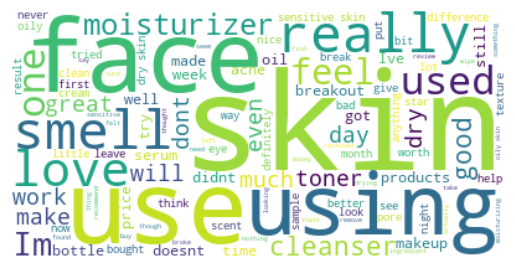

In [20]:
generate_wordcloud(negative)

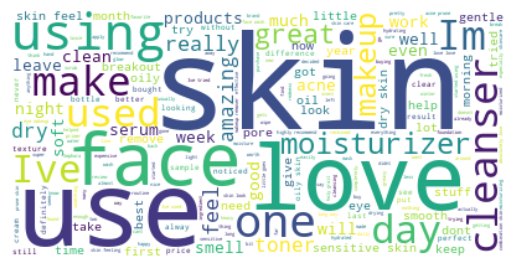

In [21]:
generate_wordcloud(positive)

If you carefully look at the wordcloud of the negative reviews, you can see that a lot of people complain about the smell of the skincare product!

Now let's analyze the indredients of the skincare products. Knowing very little about chemistry, can I distinguish the items between categories, such as serum, moisturizers, cleansers, etc..?

In [22]:
moist_df = df[df.Category == 'Moisturizer']
cleanse_df = df[df.Category == 'Cleanser']
mask_df = df[df.Category == 'Face Mask']
treat_df = df[df.Category == 'Treatment']

In [23]:
moist = " ".join(ing for ing in moist_df.Ingredients)
cleanse = " ".join(ing for ing in cleanse_df.Ingredients)
mask = " ".join(ing for ing in mask_df.Ingredients)
treat = " ".join(ing for ing in treat_df.Ingredients)

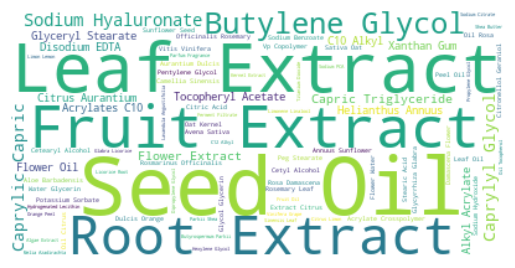

In [24]:
generate_wordcloud(moist)

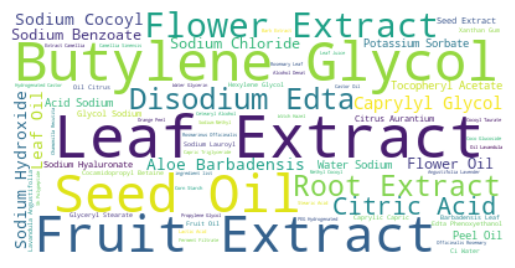

In [25]:
generate_wordcloud(cleanse)

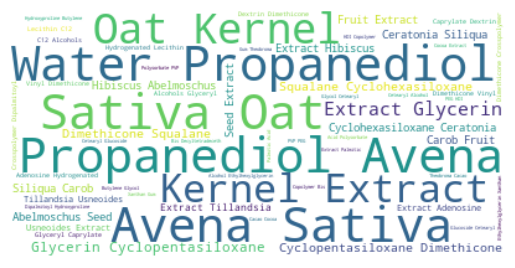

In [26]:
generate_wordcloud(mask)

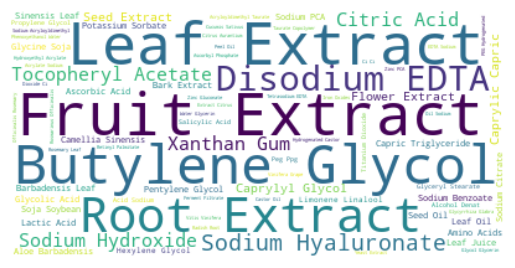

In [27]:
generate_wordcloud(treat)

Let's build a classification model to distinguish the products.

In [28]:
X = df.Ingredients
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [29]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment']

In [30]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9653259361997226
              precision    recall  f1-score   support

 Moisturizer       0.96      0.99      0.98      1031
    Cleanser       0.00      0.00      0.00         9
   Face Mask       0.99      0.96      0.98       649
   Treatment       0.94      0.92      0.93       474

    accuracy                           0.97      2163
   macro avg       0.72      0.72      0.72      2163
weighted avg       0.96      0.97      0.96      2163



In [31]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9838187702265372
              precision    recall  f1-score   support

 Moisturizer       0.99      0.98      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [32]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.9754969949144706
              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.96      1.00      0.98       649
   Treatment       0.97      0.96      0.96       474

    accuracy                           0.98      2163
   macro avg       0.98      0.98      0.98      2163
weighted avg       0.98      0.98      0.98      2163



# Latent Dirichlet Allocation

Now that we know that different skincare categories are distinguishable, it would be interesting to use unsupervised clustering to figure out how the ingredients would group naturally.

In [33]:
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
ing_raw = df.Ingredients

In [35]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(ing_raw)

In [36]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(ing_raw)

In [37]:
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [38]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.045307  0.098513       1        1  29.719774
1     -0.054946  0.090008       2        1  27.803118
0     -0.100708 -0.156776       3        1  21.867311
2      0.200961 -0.031746       4        1  20.609796, topic_info=             Term         Freq        Total Category  logprob  loglift
1079         leaf  8675.000000  8675.000000  Default  30.0000  30.0000
1761         seed  6742.000000  6742.000000  Default  29.0000  29.0000
807     gluconate  1376.000000  1376.000000  Default  28.0000  28.0000
166   azadirachta   621.000000   621.000000  Default  27.0000  27.0000
1193        melia   621.000000   621.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1961   tocopherol   526.856395  2118.985003   Topic4  -5.1719   0.1876
287      butylene   607.304202  4022.323237   Topic4  -5.0298  -0.3112
1741       sativa   439.746965  1585.333768   Topic4  -5.3526   0.2971
1441          peg   508.025958  5863.756541   Topic4  -5.2083  -0.8666
935     hydroxide   451.529209  2435.819494   Topic4  -5.3262  -0.1060

[329 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
8         1  0.994914     acer
12        1  0.284459  acetate
12        2  0.344755  acetate
12        3  0.221732  acetate
12        4  0.149280  acetate
...     ...       ...      ...
2087      4  0.021454  xanthan
2091      2  0.991347  xylitol
2094      2  0.145028   yellow
2094      3  0.652624   yellow
2094      4  0.202364   yellow

[555 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

## Quality and effectiveness check

What makes a user give a five star rating to a product? Probably visible results of using it. If a woman buys a cream that erases her wrinkes after a week of using it, it is expected that she will go to the website and write a positive review. But what makes a high quality product? Define not the package -- it's ingredients that work! Can we predict whether or not the product will get a 5 star rating just using its ingredient list?

In [39]:
X1 = df.Ingredients
y1 = df.Good_Stuff
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state = 42)

In [40]:
cat = ['1', '0']

In [41]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, y_train1)

y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.5973185390661119
              precision    recall  f1-score   support

           1       0.48      0.25      0.33       856
           0       0.63      0.82      0.71      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.52      2163
weighted avg       0.57      0.60      0.56      2163



In [42]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train1, y_train1)


y_pred1 = logreg.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6010171058714748
              precision    recall  f1-score   support

           1       0.49      0.27      0.35       856
           0       0.63      0.82      0.71      1307

    accuracy                           0.60      2163
   macro avg       0.56      0.54      0.53      2163
weighted avg       0.58      0.60      0.57      2163



In [43]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, y_train1)

y_pred1 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred1, y_test1))
print(classification_report(y_test1, y_pred1, target_names=cat))

accuracy 0.6116504854368932
              precision    recall  f1-score   support

           1       0.61      0.05      0.09       856
           0       0.61      0.98      0.75      1307

    accuracy                           0.61      2163
   macro avg       0.61      0.51      0.42      2163
weighted avg       0.61      0.61      0.49      2163



Surprisingly, none of the models could predict the quality/effectiveness with good accuracy. This can be easily explained by the fact that a lot of people remove one star from the rating because of the high price. We want to keep this in mind when we are recommending the products.

# Modeling recommenders

We start the modeling process with SVD from Surprise to predict ratings from users with unrated products based on the ratings included in the dataset

In [44]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate 
from surprise.model_selection import train_test_split as tts
from surprise.model_selection import RandomizedSearchCV

c:\ProgramData\miniconda3\envs\myenv\Lib\site-packages\surprise\__init__.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution


In [45]:
# Tạo DataFrame chứa dữ liệu về đánh giá sản phẩm từ người dùng 
data = df[['User_id', 'Product_id', 'Rating']]
# Khởi tạo đối tượng Reader để đọc dữ liệu
reader = Reader(line_format='user item rating', sep=',')
# Tạo Dataset từ DataFrame đã tạo và đối tượng Reader
data = Dataset.load_from_df(data, reader=reader)
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra, 80% train - 20% test
trainset, testset = tts(data, test_size=.2)

In [46]:
# Khởi tạo và huấn luyện mô hình SVD trên tập huấn luyện
svd = SVD()
svd.fit(trainset)

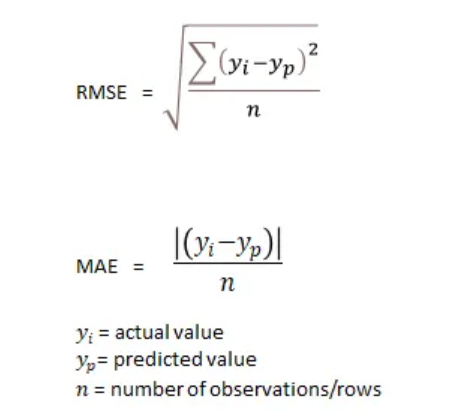

In [47]:
# Dự đoán điểm đánh giá cho các sản phẩm trong tập kiểm tra
predictions = svd.test(testset)
# Đánh giá chất lượng dự đoán bằng các độ đo RMSE và MAE 
# đo lường sai số giữa giá trị dự đoán bởi mô hình và giá trị thực tế của dữ liệu
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
# print("RMSE", rmse)
# print("MAE", mae)

RMSE: 0.1272
MAE:  0.0686


Predictions are off by 0.1 stars!

In [48]:
# Ví dụ: Dự đoán rating của một người dùng cho một sản phẩm cụ thể
user_id = 1
product_id = 151  # Giả sử sản phẩm có ID là 4
predicted_rating = svd.predict(user_id, product_id).est
print(f"Predicted rating for user_id {user_id} and product_id {product_id}: {predicted_rating}")


Predicted rating for user_id 1 and product_id 151: 3.9303510449694494


## Recommender that uses the customer features only to recommend the products

In [49]:
def recommend_products_by_user_features(skintone, skintype, eyecolor, haircolor, percentile=0.85):
    ddf = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    recommendations = ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars', 'Product_Url', 'Product']]
    recommendations = recommendations.sort_values('Rating_Stars', ascending=False).head(10)
    
    print('Based on your features, these are the top products for you:')
    return recommendations

In [50]:
recommend_products_by_user_features('Light', 'Combination', 'Green', 'Brunette')

Based on your features, these are the top products for you:


,Rating_Stars,Product_Url,Product
349,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
1977,5,https://www.sephora.com/product/ultimate-mirac...,Ultimate Miracle Worker Multi-Rejuvenating Cre...
2800,5,https://www.sephora.com/product/aqua-bomb-slee...,Aqua Bomb Sleeping Mask
2918,5,https://www.sephora.com/product/vitamin-c-anti...,Vitamin Nectar Antioxidant Face Mist
2944,5,https://www.sephora.com/product/peat-miracle-r...,Peat Miracle Revital Cream
2998,5,https://www.sephora.com/product/gold-camellia-...,Gold Camellia Beauty Oil
350,5,https://www.sephora.com/product/bi-facil-doubl...,Bi-Facil Double-Action Eye Makeup Remover
3525,5,https://www.sephora.com/product/the-cleansing-...,The Cleansing Foam
3999,5,https://www.sephora.com/product/clean-bee-ultr...,Clean Bee Ultra Gentle Facial Cleanser
4069,5,https://www.sephora.com/product/time-release-a...,Time Release Acne Cleanser


## Collaborative filtering with Lightfm

In [51]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

Tạo interaction matrix chứa thông tin về các tương tác đã ghi nhận giữa user và item: Hàng - user, Cột - item
Giá trị tại một ô trong ma trận biểu thị rating của user với item đó.


In [52]:
def create_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [53]:
interaction_matrix = create_interaction_matrix(df=df, user_col='User_id', item_col = 'Product_id', rating_col='Rating_Stars')
interaction_matrix.head()

Product_id,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
User_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# for i in range(interaction_matrix.shape[0]):
#     for j in range(interaction_matrix.shape[1]):
#         value = interaction_matrix.iloc[i,j]
#         if value != 0:
#              print(f"Ô ({i}, {j}) có giá trị: {value}")
# # print(interaction_matrix)

Ô (0, 204) có giá trị: 5.0
Ô (1, 151) có giá trị: 1.0
Ô (2, 146) có giá trị: 1.0
Ô (3, 222) có giá trị: 4.0
Ô (4, 267) có giá trị: 5.0
Ô (5, 247) có giá trị: 4.0
Ô (6, 37) có giá trị: 4.0
Ô (7, 179) có giá trị: 1.0
Ô (8, 148) có giá trị: 5.0
Ô (9, 181) có giá trị: 4.0
Ô (10, 182) có giá trị: 10.0
Ô (11, 156) có giá trị: 5.0
Ô (12, 31) có giá trị: 5.0
Ô (13, 156) có giá trị: 5.0
Ô (14, 182) có giá trị: 10.0
Ô (15, 148) có giá trị: 5.0
Ô (16, 29) có giá trị: 10.0
Ô (17, 17) có giá trị: 1.0
Ô (18, 14) có giá trị: 5.0
Ô (18, 301) có giá trị: 4.0
Ô (19, 20) có giá trị: 4.0
Ô (20, 64) có giá trị: 5.0
Ô (21, 48) có giá trị: 10.0
Ô (22, 243) có giá trị: 5.0
Ô (23, 204) có giá trị: 5.0
Ô (24, 279) có giá trị: 5.0
Ô (24, 300) có giá trị: 5.0
Ô (25, 171) có giá trị: 5.0
Ô (26, 211) có giá trị: 2.0
Ô (27, 190) có giá trị: 2.0
Ô (28, 28) có giá trị: 5.0
Ô (29, 47) có giá trị: 2.0
Ô (30, 274) có giá trị: 5.0
Ô (31, 4) có giá trị: 3.0
Ô (32, 74) có giá trị: 2.0
Ô (33, 34) có giá trị: 4.0
Ô (34, 281) 

KeyboardInterrupt: 

In [55]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    train_auc = auc_score(model, x, num_threads=n_jobs).mean()
    print('Collaborative filtering AUC: %s' % train_auc)
    print("Train precision: %.4f" % precision_at_k(model, x, k=k,num_threads=n_jobs).mean())

    return model

In [56]:
mf_model = runMF(interactions = interaction_matrix,
                 n_components = 30,
                 loss = 'warp',
                 k = 15,
                 epoch = 30,
                 n_jobs = 4)

In [57]:
def create_user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

In [58]:
user_dict = create_user_dict(interaction_matrix)
# print(user_dict)

In [59]:
def create_item_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

In [60]:
product_dict = create_item_dict(df = df, id_col = 'Product_id', name_col = 'Product')
print(product_dict)

{157: 'Superfood Antioxidant Cleanser', 65: 'Cleansing & Exfoliating Wipes', 210: 'Purity Made Simple Cleanser', 35: 'Beste™ No. 9 Jelly Cleanser', 196: 'The Rice Polish Foaming Enzyme Powder', 229: 'Rose Deep Hydration Facial Toner', 255: 'Take The Day Off Cleansing Balm', 36: 'Bi-Facil Double-Action Eye Makeup Remover', 29: 'Balancing Force™ Oil Control Toner', 32: 'Beauty Elixir', 310: 'Waterproof Eye Makeup Remover', 257: 'Take The Day Off Makeup Remover For Lids, Lashes & Lips', 117: 'Facial Cotton', 113: 'ExfoliKate® Cleanser Daily Foaming Wash', 57: 'Checks and Balances™ Frothy Face Wash', 52: 'Calendula Herbal Extract Alcohol Free Toner', 258: 'The Clean Truth™ Foaming Cleanser', 278: 'Transforming Walnut Scrub', 144: 'Greek Yoghurt Foaming Cream Cleanser', 81: 'CoQ-10 Toner', 48: 'Brightening Cleanser', 271: 'The True Cream Aqua Bomb', 268: 'The Moisturizing Soft Cream', 272: 'The True Cream Moisturizing Bomb', 79: 'COMPLEXION RESCUE™ Tinted Moisturizer Broad Spectrum SPF 30',

In [61]:
def sample_recommendation_user(model, interactions, user_id, user_dict,
                               item_dict, threshold = 0, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    #print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    #print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))

    if show == True:
        print(scores)

    return scores 

In [62]:
rec_list = sample_recommendation_user(model = mf_model, 
                                      interactions = interaction_matrix, 
                                      user_id = 4792, 
                                      user_dict = user_dict,
                                      item_dict = product_dict, 
                                      threshold = 4,
                                      nrec_items = 10,
                                      show = True)

## Content-based recommendations using Ingredients of the product

In [63]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [64]:
df_cont = df[['Product', 'Product_id', 'Ingredients', 'Product_Url', 'Ing_Tfidf', 'Rating']]
df_cont.drop_duplicates(inplace=True)

In [65]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_cont['Ingredients'])

In [66]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [67]:
df_cont = df_cont.reset_index(drop=True)
titles = df_cont[['Product', 'Ing_Tfidf', 'Rating']]
indices = pd.Series(df_cont.index, index=df_cont['Product'])

In [68]:
def content_recommendations(product):
    idx = indices[product]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return titles.iloc[product_indices]

In [69]:
content_recommendations('The Rice Polish Foaming Enzyme Powder')

NameError: name 'content_recommendations' is not defined

These recommendations actually make a lot of sense. I have tested it on the product that I used and loved, and it spits out the names that I also enjoy!